In [1]:
# import os
# os.environ['MYPATH']=r' C:\Users\sivateja_k\AppData\Roaming\jupyter\kernels\nlpproject'

In [2]:
import pandas as pd
data=pd.read_csv(r"/home/siva/Desktop/NLP_Project/dataset/Reviews.csv")
data.head(5)
#below is our sample data of 5 rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/siva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data.shape
#we have 568454 rows and 10 columns

(568454, 10)

In [5]:
#checking for null values
#we have 16 null values in profileName and summary 27 null values
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

<AxesSubplot:>

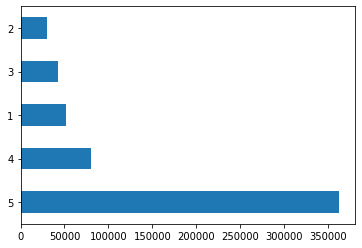

In [6]:
#lets see how the number of users gave each rating
data['Score'].value_counts().plot(kind='barh')

#1 and 2 rating indicate positive reviews
#4 and 5 rating indicate negative reviews
#3 indicate neutral reviews

In [7]:
# Now lets clean the data
#Firstly lets remove the 3 rating rows as they are not helpful to predict the sentiment
rating3_data=data[data['Score']==3]
print(rating3_data.shape)
print("resulting filtered data length after dropping rating 3 should be "+str(len(data)-len(rating3_data)))
filtered_data=data[data['Score']!=3]
print("Filtered data length is "+str(len(filtered_data)))

(42640, 10)
resulting filtered data length after dropping rating 3 should be 525814
Filtered data length is 525814


In [8]:
#lets assign proper score 1- for 4 and 5 ratings and 0- for 1 and 2 ratings
def assign_score(Score):
    return 0 if Score<3 else 1
filtered_data['sentiment']=filtered_data['Score'].apply(assign_score)
filtered_data.drop(['Score'],axis=1,inplace=True)
filtered_data.head()

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


1    443777
0     82037
Name: sentiment, dtype: int64


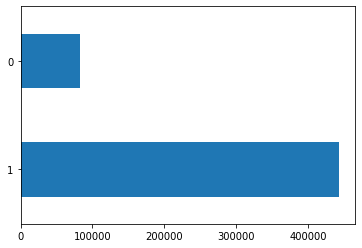

In [9]:
#lets see the sentiment graph
filtered_data['sentiment'].value_counts().plot(kind='barh')
print(filtered_data['sentiment'].value_counts())

In [10]:
#there are duplicate values in the data for example
filtered_data[filtered_data["UserId"]=="AR5J8UI46CURR"]
#here we have same userid but multiple logs entered with different product ids but every product have same review summary.
#got to these urls https://www.amazon.com/dp/asin/B000HDOPZG , https://www.amazon.com/dp/asin/B000HDL1RQ
# URL is same just change the product ids after asin in the links which indicate the product ids, then we can see its same product 
#but different flavors so when user gave ratings its logging to other flavors as well. so we need to remove these duplicates.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,sentiment
73790,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
78444,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
138276,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
138316,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
155048,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1


In [11]:
filtered_data=filtered_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
filtered_data.shape

(364173, 10)

In [12]:
#helpfulness numerator should always be <= helpfulness denominator so lets see if there is some incorrect data
filtered_data[filtered_data.HelpfulnessNumerator>filtered_data.HelpfulnessDenominator]
#we got 2 records of them. so lets remove this rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,sentiment
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,1
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,1


In [13]:
filtered_data=filtered_data[filtered_data.HelpfulnessNumerator<=filtered_data.HelpfulnessDenominator]
filtered_data.shape

(364171, 10)

In [14]:
stop=set(stopwords.words('english'))
print(stop)

{'weren', 'where', 'his', 'a', 'my', 'was', 'other', 'under', 'did', 'during', 's', 'an', 'their', 'in', "wouldn't", 'because', 'just', 'very', 'who', 'were', 've', 'her', "needn't", 'shan', 'such', 'you', 'him', 'whom', 'not', 'should', 're', 'below', 'this', "you'll", 'about', 'will', 'i', 'each', "aren't", 'yours', 'than', 'down', 'too', 'to', 'haven', 't', 'couldn', 'we', 'it', 'won', 'yourselves', "shan't", 'up', 'hasn', 'only', "don't", 'its', 'have', 'no', 'm', 'needn', 'those', "shouldn't", 'been', "she's", 'aren', 'isn', 'wouldn', "you've", 'our', 'by', "haven't", 'between', 'ours', 'here', 'at', 'can', 'themselves', 'the', 'once', 'nor', "couldn't", "mustn't", 'they', "mightn't", 'as', 'mustn', 'what', 'ourselves', 'more', 'ain', 'doing', "hasn't", 'so', 'y', 'having', 'same', 'hadn', "isn't", 'ma', "that'll", "hadn't", 'mightn', 'after', 'be', 'until', "should've", 'most', 'against', "won't", 'again', 'over', 'do', 'are', 'through', 'these', 'hers', 'd', 'am', 'or', "it's", 

In [15]:
snow=nltk.stem.SnowballStemmer('english')

In [16]:
def cleanHTMLTags(sentence):
    return re.sub(re.compile('<.*?>'),' ',sentence)
def cleanPunctuations(sentence):
    return re.sub(r'[.|,|)|(|\|/]',r' ',re.sub(r'[?|!|\'|"|#]',r' ',sentence))

In [17]:
#lets see if html tags are present in code. If present lets check how many sentences are present and also a sample sentence
#with html tag
i=0
for sentence in filtered_data['Text'].values:
    if(len(re.findall('<.*?>',sentence))):
        if i==0:
            print(sentence)
        i+=1
print(i)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!
93153


In [18]:
#sample string message where we removed html tags
cleanHTMLTags("I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service")

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.  Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.  If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.  Thank you for the personal, incredible service"

In [19]:
#sample example for using contraction
import contractions
print(contractions.fix("I don't know if it's the cactus or the tequila"))
print(contractions.fix("he's"))

I do not know if it is the cactus or the tequila
he is


In [20]:
str1=" "
all_positive_words=[]
all_negative_words=[]
final_string=[]
s=""
for sentence in filtered_data["Text"].values:
    filtered_sentence=[]
    sentence=cleanHTMLTags(sentence)
    sentence=contractions.fix(sentence)
    sentence=cleanPunctuations(sentence)
    words=[snow.stem(word) for word in sentence.split() if word not in stop]
    str1=" ".join(words)
    final_string.append(str1)

In [21]:
filtered_data["Text"]=final_string

In [22]:
#checking for null values
#we have 11 null values in profileName and summary 1 null values
filtered_data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Time                       0
Summary                    1
Text                       0
sentiment                  0
dtype: int64

In [23]:
filtered_data=filtered_data.dropna()
filtered_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Time                      0
Summary                   0
Text                      0
sentiment                 0
dtype: int64

1    307054
0     57105
Name: sentiment, dtype: int64


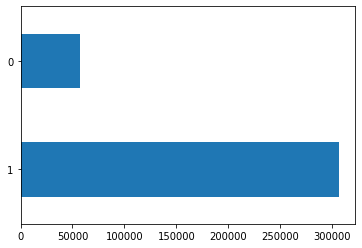

In [24]:
#lets see the sentiment graph
filtered_data['sentiment'].value_counts().plot(kind='barh')
print(filtered_data['sentiment'].value_counts())

In [25]:
review=filtered_data["Text"]
sentiment=filtered_data["sentiment"]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/siva/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


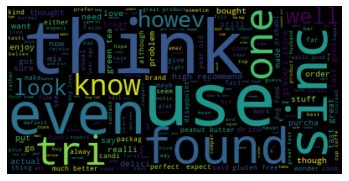

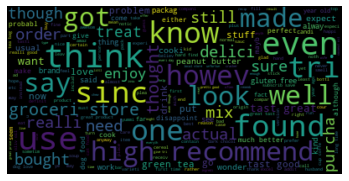

In [26]:
import utils
from utils import *
data_textOnly = " ".join(review)
get_world_cloud(data_textOnly)

(20000, 300) (20000,)


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


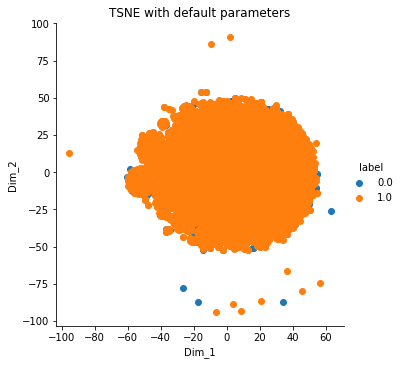

In [30]:
#ngram range=(1,2) max features=300 n_components=2, random_state=15, perplexity=50, n_iter=2000
review_train,review_test,target_train,target_test=train_test_split(review,sentiment,test_size=0.2,shuffle=True)
plot_data_using_TSNE(review_train[:20000],target_train[:20000],vec="count")